In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
maze = np.array(
        [
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
            [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
            [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
            [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1],
            [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
            [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
        ]
    )


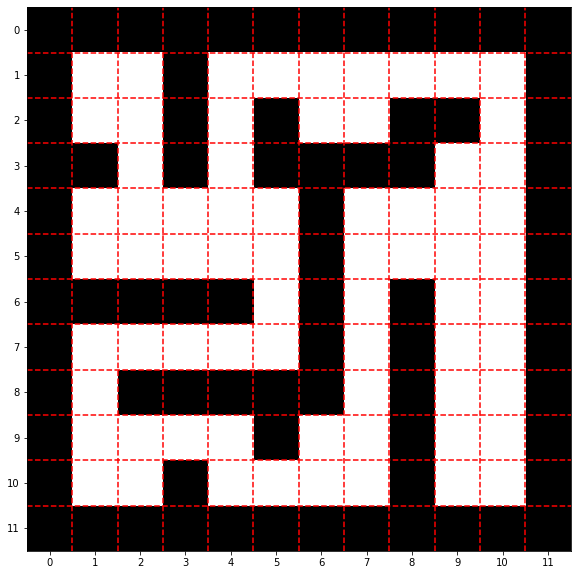

In [4]:
# get maze's size
height, width = maze.shape

plt.figure(figsize=(10, 10))
# 迷路のプロット
# Plot the maze
plt.imshow(maze, cmap="binary")

# 縦横比を1:1にする
# Set aspect to 1:1
# plt.gca().set_aspect("equal")

# x軸のラベルを90度回転
# Rotate texts of x-axis
# plt.xticks(rotation=90)


# x軸の目盛りを全て表示
# Show the all x-axis ticks
plt.xticks(np.arange(width), np.arange(width))

# y軸の目盛りを全て表示
# Show the all y-axis ticks
plt.yticks(np.arange(height), np.arange(height))
# plt.grid()
for i in range(11):
    plt.axhline(y=i+0.5,c='r',ls='--')
    plt.axvline(x=i+0.5,c='r',ls='--')

# 表示
# Show the results of plot
plt.show()

In [5]:
def get_V_map(maze):
    v_map = maze
    for row in range(len(maze)):
        for col in range(len(maze[0])):
            if maze[row][col] == 1:
                v_map[row][col] = -100
    return v_map

In [71]:
V_map = get_V_map(maze)
V_map

array([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0,    0,    0,    0,
        -100],
       [-100,    0,    0, -100,    0, -100,    0,    0, -100, -100,    0,
        -100],
       [-100, -100,    0, -100,    0, -100, -100, -100, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100, -100, -100, -100, -100,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0, -100, -100, -100, -100, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0, -100,    0,    0, -100,    0,    0,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0, -100, -100,    0,
        -100],
       [-100, -100, -

In [7]:
def is_passable(maze, x, y):
    return maze[y][x] != -100

In [8]:
def get_reward(x, y, goal_x, goal_y):
    if (x == goal_x) and (y == goal_y):
        return 1
    return 0

In [9]:
# TD difference
def get_TD(V_map, reward, x, y, gama, next_x, next_y):
      return (gama * V_map[next_y][next_x]) + reward - V_map[y][x]

In [10]:
def renew_value(V_map, TD, alpha, x, y):
      return V_map[y][x] + (alpha * TD)

In [66]:
# [up, left, down, right] = [0, 1, 2, 3]
def random_search_once(maze, V_map, x, y, gama, alpha, goal_x, goal_y):
    next_x = x
    next_y = y
        
    while True:
        select = np.random.randint(4, size=1)    
        if select == 0: # up
            next_y -= 1
        elif select == 1: # left
            next_x -= 1
        elif select == 2: # down
            next_y += 1
        else: # right
            next_x += 1
        if is_passable(maze, next_x, next_y):
            break
        else:
            next_x = x
            next_y = y
  
    reward = get_reward(next_x, next_y, goal_x, goal_y)
    TD = get_TD(V_map, reward, x, y, gama, next_x, next_y)
    new_value = renew_value(V_map, TD, alpha, x, y)
    V_map[y][x] = new_value
    return [next_x, next_y]

In [67]:
# [up, left, down, right] = [0, 1, 2, 3]
def greedy_search_once(maze, V_map, x, y, gama, alpha, goal_x, goal_y):
    next_x = x
    next_y = y
    TD_max = -100
    TD = -100

    for i in range(4):
        if i == 0:
            if is_passable(maze, x, y-1):
                reward = get_reward(x, y-1, goal_x, goal_y)
                TD = get_TD(V_map, reward, x, y, gama, x, y-1)
                next_y = y - 1
                TD_max = TD
        elif i == 1:
            if is_passable(maze, x-1, y):
                reward = get_reward(x-1, y, goal_x, goal_y)
                TD = get_TD(V_map, reward, x, y, gama, x-1, y)
                if(TD > TD_max):
                    next_x = x - 1
                    next_y = y
                    TD_max = TD
        elif i == 2:
            if is_passable(maze, x, y+1):
                reward = get_reward(x, y+1, goal_x, goal_y)
                TD = get_TD(V_map, reward, x, y, gama, x, y+1)
                if(TD > TD_max):
                    next_x = x
                    next_y = y + 1
                    TD_max = TD
        else:
            if is_passable(maze, x+1, y):
                reward = get_reward(x+1, y, goal_x, goal_y)
                TD = get_TD(V_map, reward, x, y, gama, x+1, y)
                if(TD > TD_max):
                    next_x = x + 1
                    next_y = y
                    TD_max = TD
    
    new_value = renew_value(V_map, TD_max, alpha, x, y)
    V_map[y][x] = new_value
    return [next_x, next_y]

In [68]:
def epsilon_greedy(start_x, start_y, goal_x, goal_y, maze, V_map, gama, alpha, epsilon):
    pos_x = start_x
    pos_y = start_y
    policy_list = list()
    pos_list = list()
    step = 0
    pos_list.append([1, 1])
    while pos_x != goal_x or pos_y != goal_y:
        select = np.random.rand()
        if select >= epsilon:
            [new_pos_x, new_pos_y] = greedy_search_once(maze, V_map, pos_x, pos_y, gama, alpha, goal_x, goal_y)
            policy_list.append(1)
            # print("policy", 1)
        else:
            [new_pos_x, new_pos_y] = random_search_once(maze, V_map, pos_x, pos_y, gama, alpha, goal_x, goal_y)
            policy_list.append(0)
            # print("policy", 0)
        pos_x = new_pos_x
        pos_y = new_pos_y
        # print(pos_x, pos_y)
    
        pos_list.append([new_pos_x, new_pos_y])
        
#         print("Step{:d}".format(step+1))
        step += 1
    return V_map, pos_list, policy_list

In [69]:
greedy_search_once(maze, V_map, 10, 9, 0.95, 0.2, 10, 10)

[10, 10]

In [70]:
random_search_once(maze, V_map, 10, 9, 0.95, 0.2, 10, 10)

[9, 9]

In [54]:
V, p, plc = epsilon_greedy(1, 1, 10, 10, maze, V_map, 0.5, 1, 1)

In [55]:
V

array([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0,    0,    0,    0,
        -100],
       [-100,    0,    0, -100,    0, -100,    0,    0, -100, -100,    0,
        -100],
       [-100, -100,    0, -100,    0, -100, -100, -100, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100, -100, -100, -100, -100,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0, -100, -100, -100, -100, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0, -100,    0,    0, -100,    0,    1,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0, -100,    0,    0,
        -100],
       [-100, -100, -

In [56]:
V, p, plc = epsilon_greedy(1, 1, 10, 10, maze, V, 0.5, 1, 1)
V

array([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0,    0,    0,    0,
        -100],
       [-100,    0,    0, -100,    0, -100,    0,    0, -100, -100,    0,
        -100],
       [-100, -100,    0, -100,    0, -100, -100, -100, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100, -100, -100, -100, -100,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0, -100, -100, -100, -100, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0, -100,    0,    0, -100,    0,    1,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0, -100,    0,    0,
        -100],
       [-100, -100, -

In [57]:
V, p, plc = epsilon_greedy(1, 1, 10, 10, maze, V, 0.5, 1, 1)
V

array([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0,    0,    0,    0,
        -100],
       [-100,    0,    0, -100,    0, -100,    0,    0, -100, -100,    0,
        -100],
       [-100, -100,    0, -100,    0, -100, -100, -100, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100, -100, -100, -100, -100,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0, -100, -100, -100, -100, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0, -100,    0,    0, -100,    0,    0,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0, -100,    1,    0,
        -100],
       [-100, -100, -

In [58]:
V, p, plc = epsilon_greedy(1, 1, 10, 10, maze, V, 0.5, 1, 1)
V

array([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0,    0,    0,    0,
        -100],
       [-100,    0,    0, -100,    0, -100,    0,    0, -100, -100,    0,
        -100],
       [-100, -100,    0, -100,    0, -100, -100, -100, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100, -100, -100, -100, -100,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0, -100, -100, -100, -100, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0, -100,    0,    0, -100,    0,    1,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0, -100,    1,    0,
        -100],
       [-100, -100, -

In [59]:
V, p, plc = epsilon_greedy(1, 1, 10, 10, maze, V, 0.5, 1, 1)
V

array([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0,    0,    0,    0,
        -100],
       [-100,    0,    0, -100,    0, -100,    0,    0, -100, -100,    0,
        -100],
       [-100, -100,    0, -100,    0, -100, -100, -100, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
        -100],
       [-100, -100, -100, -100, -100,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0,    0, -100,    0, -100,    0,    0,
        -100],
       [-100,    0, -100, -100, -100, -100, -100,    0, -100,    0,    0,
        -100],
       [-100,    0,    0,    0,    0, -100,    0,    0, -100,    0,    1,
        -100],
       [-100,    0,    0, -100,    0,    0,    0,    0, -100,    0,    0,
        -100],
       [-100, -100, -

In [73]:
pos_list_full = list()
policy_list_full = list()
for i in range(100):
    V_map, pos_list, policy_list = epsilon_greedy(1, 1, 10, 10, maze, V_map, 0.95, 1, 1)
    pos_list_full.append(pos_list)
    policy_list_full.append(policy_list)
    print("Epoch{:d}".format(i+1), end='')
V_map, pos_list_full[0]

Epoch1Epoch2Epoch3Epoch4Epoch5Epoch6Epoch7Epoch8Epoch9Epoch10Epoch11Epoch12Epoch13Epoch14Epoch15Epoch16Epoch17Epoch18Epoch19Epoch20Epoch21Epoch22Epoch23Epoch24Epoch25Epoch26Epoch27Epoch28Epoch29Epoch30Epoch31Epoch32Epoch33Epoch34Epoch35Epoch36Epoch37Epoch38Epoch39Epoch40Epoch41Epoch42Epoch43Epoch44Epoch45Epoch46Epoch47Epoch48Epoch49Epoch50Epoch51Epoch52Epoch53Epoch54Epoch55Epoch56Epoch57Epoch58Epoch59Epoch60Epoch61Epoch62Epoch63Epoch64Epoch65Epoch66Epoch67Epoch68Epoch69Epoch70Epoch71Epoch72Epoch73Epoch74Epoch75Epoch76Epoch77Epoch78Epoch79Epoch80Epoch81Epoch82Epoch83Epoch84Epoch85Epoch86Epoch87Epoch88Epoch89Epoch90Epoch91Epoch92Epoch93Epoch94Epoch95Epoch96Epoch97Epoch98Epoch99Epoch100

(array([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100],
        [-100,    0,    0, -100,    0,    0,    0,    0,    0,    0,    0,
         -100],
        [-100,    0,    0, -100,    0, -100,    0,    0, -100, -100,    0,
         -100],
        [-100, -100,    0, -100,    0, -100, -100, -100, -100,    0,    0,
         -100],
        [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
         -100],
        [-100,    0,    0,    0,    0,    0, -100,    0,    0,    0,    0,
         -100],
        [-100, -100, -100, -100, -100,    0, -100,    0, -100,    0,    0,
         -100],
        [-100,    0,    0,    0,    0,    0, -100,    0, -100,    0,    0,
         -100],
        [-100,    0, -100, -100, -100, -100, -100,    0, -100,    0,    0,
         -100],
        [-100,    0,    0,    0,    0, -100,    0,    0, -100,    0,    1,
         -100],
        [-100,    0,    0, -100,    0,    0,    0,    0, -100, -100,    0,
         -100],